In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [3]:
run1 = pd.read_excel("D:\\ZheS\\GST with FC\\GST with FC\\BM\\quant\\GST_3MMgCl2_Chymo_2uL_15cm_01102019_run1.xlsx")
run2 = pd.read_excel("D:\\ZheS\\GST with FC\\GST with FC\\BM\\quant\\GST_3MMgCl2_Chymo_2uL_15cm_01102019_run2.xlsx")
run1 = run1.sort_values(["Annotated Sequence",'Charge','RT [min]']).drop_duplicates(["Annotated Sequence","Charge"])
run2 = run2.sort_values(["Annotated Sequence",'Charge','RT [min]']).drop_duplicates(["Annotated Sequence",'Charge'])


In [4]:
merged = run1.merge(run2,on=['Annotated Sequence','Charge'])

merged = merged[['Annotated Sequence','Charge','RT [min]_x','RT [min]_y']]
merged['diff'] = merged['RT [min]_x'] - merged['RT [min]_y']

In [5]:
def assess(x):
    if abs(x)<=2:
        return "Good"
    else:
        return "Bad"

c:\users\shi lab\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


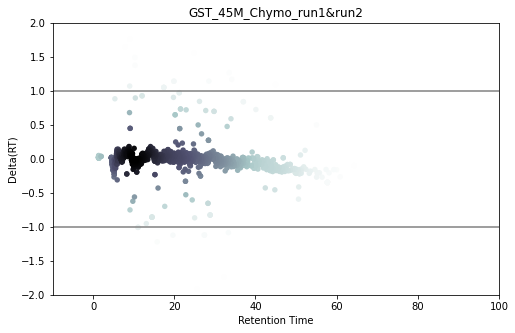

In [7]:
plt.figure(figsize=(8,5))
plt.ylim((-2,2))
x = merged['RT [min]_x']
y = merged['diff']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.ylabel("Delta(RT)")
plt.xlabel("Retention Time")
plt.title("GST_45M_Chymo_run1&run2")
plt.scatter(x, y, c=z, s=30, cmap="bone_r",edgecolor='')
plt.xlim((-10,100))
plt.hlines(y=1,xmin=-10,xmax=100,color='grey')
plt.hlines(y=-1,xmin=-10,xmax=100,color='grey')
#plt.savefig("GST_45M_Chymo_run1&run2.svg",format="svg")



In [8]:
ph11 = pd.read_excel("D:\\ZheS\\GST with FC\\GST with FC\\BM\\quant\\GST_pH11_chymo_3uL_15cm_12132018_run1.xlsx")
ph12 = pd.read_excel("D:\\ZheS\\GST with FC\\GST with FC\\BM\\quant\\GST_pH12_chymo_3uL_15cm_12132018_run1.xlsx")
ph13 = pd.read_excel("D:\\ZheS\\GST with FC\\GST with FC\\BM\\quant\\GST_pH13_chymo_3uL_15cm_12132018_run1.xlsx")

ph11 = ph11.sort_values(["Annotated Sequence",'Charge','RT [min]']).drop_duplicates(["Annotated Sequence","Charge"])
ph12 = ph12.sort_values(["Annotated Sequence",'Charge','RT [min]']).drop_duplicates(["Annotated Sequence",'Charge'])
ph13 = ph13.sort_values(["Annotated Sequence",'Charge','RT [min]']).drop_duplicates(["Annotated Sequence",'Charge'])

merged_1 = ph11.merge(ph12,on=['Annotated Sequence','Charge'])
merged_1 = merged_1[['Annotated Sequence','Charge','RT [min]_x','RT [min]_y']]
merged_1['diff'] = merged_1['RT [min]_x'] - merged_1['RT [min]_y']
merged_1['quality'] = merged_1['diff'].apply(lambda x:assess(x))


merged_2 = ph11.merge(ph13,on=['Annotated Sequence','Charge'])
merged_2 = merged_2[['Annotated Sequence','Charge','RT [min]_x','RT [min]_y']]
merged_2['diff'] = merged_2['RT [min]_x'] - merged_2['RT [min]_y']
merged_2['quality'] = merged_2['diff'].apply(lambda x:assess(x))

c:\users\shi lab\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  del sys.path[0]
c:\users\shi lab\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
c:\users\shi lab\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
c:\users\shi lab\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


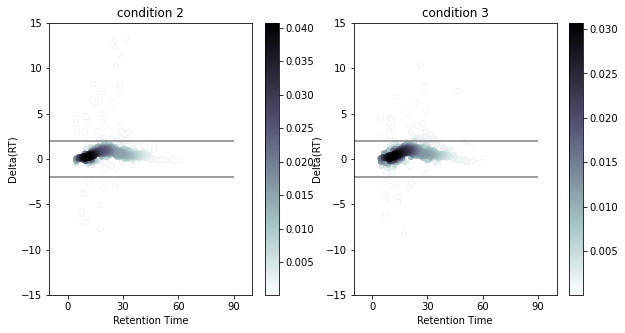

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.ylim((-15,15))
x = merged_1['RT [min]_x']
y = merged_1['diff']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.ylabel("Delta(RT)")
plt.xlabel("Retention Time")
plt.scatter(x, y,color='lightgrey',alpha=0.6,edgecolors='')
plt.scatter(x, y, c=z, s=30, cmap="bone_r",edgecolor='')
plt.colorbar()
plt.title("condition 2")
plt.xticks(np.arange(0,100,step=30),)
plt.xlim((-10,100))
plt.hlines(y=2,xmin=-10,xmax=90,color='grey')
plt.hlines(y=-2,xmin=-10,xmax=90,color='grey')



plt.subplot(122)
plt.ylim((-15,15))
x = merged_2['RT [min]_x']
y = merged_2['diff']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.ylabel("Delta(RT)")
plt.xlabel("Retention Time")
plt.scatter(x, y,color='lightgrey',alpha=0.6,edgecolors='')
plt.scatter(x, y, c=z, s=30, cmap="bone_r",edgecolor='')
plt.colorbar()
plt.title("condition 3")
plt.xticks(np.arange(0,100,step=30),)
plt.xlim((-10,100))
plt.hlines(y=2,xmin=-10,xmax=90,color='grey')
plt.hlines(y=-2,xmin=-10,xmax=90,color='grey')

#plt.savefig("GST_Chymo_highph_RT_Diff.svg",format='svg')

In [10]:
from scipy.stats import pearsonr

Text(10, 70, 'Pearson Coefficient:0.9903')

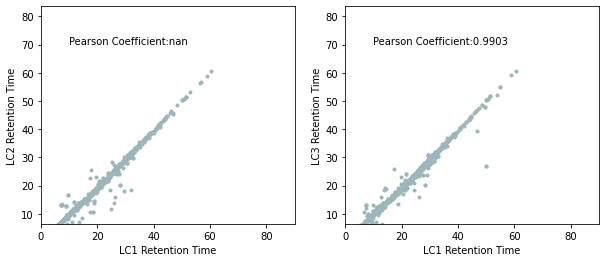

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.axis('equal')
plt.xlim((0,90))
plt.ylim((0,90))
plt.scatter(merged_1['RT [min]_x'],merged_1['RT [min]_y'],color='#9BB7BB',marker='.')
plt.xlabel("LC1 Retention Time")
plt.ylabel("LC2 Retention Time")


pc = pearsonr(merged_1['RT [min]_x'],merged_1['RT [min]_y'])[0]
plt.text(x=10,y=70,s="Pearson Coefficient:{}".format(round(pc,4)))

plt.subplot(122)
plt.axis('equal')
plt.xlim((0,90))
plt.ylim((0,90))
plt.scatter(merged_2['RT [min]_x'],merged_2['RT [min]_y'],color='#9BB7BB',marker='.')
plt.xlabel("LC1 Retention Time")
plt.ylabel("LC3 Retention Time")


pc = pearsonr(merged_2['RT [min]_x'],merged_2['RT [min]_y'])[0]
plt.text(x=10,y=70,s="Pearson Coefficient:{}".format(round(pc,4)))
#plt.savefig("GST_Chymo_HighpH_pearson.svg",format='svg')

